In [1]:
#dataset
datapath=r"C:\Users\Dell\Desktop\Learnbay\Deep_learning\data sets\sms_spam.csv"

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
dat1=pd.read_csv(datapath)
dat1.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# checking dimensions
print(f"The dataset has {dat1.shape[0]} rows and {dat1.shape[1]} columns.")

The dataset has 5574 rows and 2 columns.


In [5]:
# check dataset
dat1.describe()

,type,text
count,5574,5574
unique,2,5160
top,ham,"Sorry, I'll call later"
freq,4827,30


In [6]:
dat1.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4827   4518                             Sorry, I'll call later   30
spam   747    642  Please call our customer service representativ...    4

In [7]:
#creating legth column to analyse texts
dat1["Length"]=dat1.text.apply(len)
dat1.head()

,type,text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


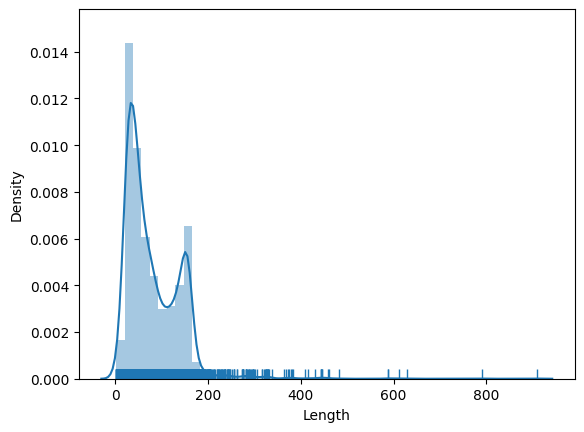

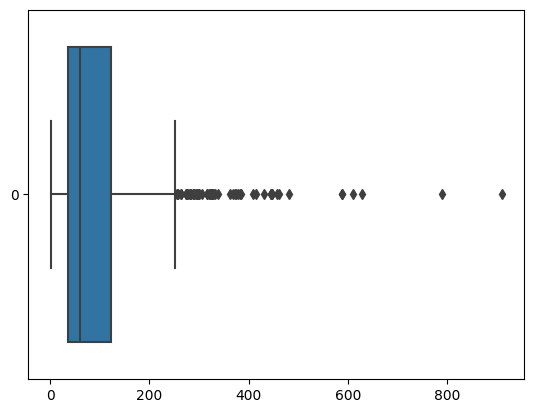

In [8]:
# checking distribustion of length of the messages
sns.distplot(dat1["Length"], rug=True,)
plt.show()
sns.boxplot(dat1["Length"],orient="h")
plt.show()
sns.set_style('dark')

In [9]:
dat1.Length.describe()

count    5574.000000
mean       80.444923
std        59.841828
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [10]:
# cheking the longest message
print(dat1[dat1["Length"]==910.0]["text"].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [11]:
#text Preprocessing
import string
message = 'This is a## dummy me%ssage to showcase the ?*ability of !the module%$'
cleansent=[word for word in message if word not in string.punctuation]
mess="".join(cleansent)
print(mess)

This is a dummy message to showcase the ability of the module


In [12]:
# checking nltk Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer().lemmatize

In [13]:
def textprocessor(mess):
    cleansent=[word for word in mess if word not in string.punctuation]
    messege="".join(cleansent)
    kim=[word for word in messege.split()  if word.lower() not in stopwords.words("english")]
    return [lem(word, pos="v") for word in kim]

In [14]:
dat1["text"].head().apply(textprocessor)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, go, usf, live, around, though]
Name: text, dtype: object

In [15]:
dat1.head()

,type,text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# wordEmbedding
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [17]:
# extracting Vocabulary
bow=CountVectorizer(analyzer=textprocessor).fit(dat1["text"])

In [18]:
print(len(bow.vocabulary_))

10496


In [19]:
print(bow.vocabulary_)

{'Go': 2058, 'jurong': 7149, 'point': 8359, 'crazy': 5585, 'Available': 1110, 'bugis': 5127, 'n': 7831, 'great': 6602, 'world': 10242, 'la': 7246, 'e': 5982, 'buffet': 5126, 'Cine': 1483, 'get': 6501, 'amore': 4631, 'wat': 10071, 'Ok': 3059, 'lar': 7277, 'Joking': 2445, 'wif': 10166, 'u': 9835, 'oni': 8071, 'Free': 1939, 'entry': 6081, '2': 423, 'wkly': 10209, 'comp': 5468, 'win': 10178, 'FA': 1831, 'Cup': 1551, 'final': 6274, 'tkts': 9674, '21st': 443, 'May': 2799, '2005': 430, 'Text': 3948, '87121': 871, 'receive': 8644, 'questionstd': 8568, 'txt': 9824, 'rateTCs': 8603, 'apply': 4706, '08452810075over18s': 73, 'U': 4062, 'dun': 5970, 'say': 8881, 'early': 5987, 'hor': 6814, 'c': 5161, 'already': 4607, 'Nah': 2943, 'dont': 5904, 'think': 9609, 'go': 6534, 'usf': 9929, 'live': 7388, 'around': 4744, 'though': 9623, 'FreeMsg': 1941, 'Hey': 2220, 'darling': 5672, '3': 543, 'weeks': 10109, 'word': 10232, 'back': 4845, 'Id': 2344, 'like': 7360, 'fun': 6437, 'still': 9317, 'Tb': 3925, 'ok':

In [20]:
#tranforming the  count vectors
bow1=bow.transform(dat1["text"])
bow1# sparse matrix

<5574x10496 sparse matrix of type '<class 'numpy.int64'>'
	with 50345 stored elements in Compressed Sparse Row format>

In [21]:
print(bow1)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2058)	1
  (0, 4631)	1
  (0, 5126)	1
  (0, 5127)	1
  (0, 5585)	1
  (0, 5982)	1
  (0, 6501)	1
  (0, 6602)	1
  (0, 7149)	1
  (0, 7246)	1
  (0, 7831)	1
  (0, 8359)	1
  (0, 10071)	1
  (0, 10242)	1
  (1, 2445)	1
  (1, 3059)	1
  (1, 7277)	1
  (1, 8071)	1
  (1, 9835)	1
  (1, 10166)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5570, 6379)	1
  (5570, 6534)	1
  (5570, 6792)	1
  (5570, 10489)	1
  (5571, 3223)	1
  (5571, 3716)	1
  (5571, 7751)	1
  (5571, 9402)	1
  (5572, 4499)	1
  (5572, 4990)	1
  (5572, 5150)	1
  (5572, 6041)	1
  (5572, 6385)	1
  (5572, 6523)	1
  (5572, 6640)	1
  (5572, 6909)	1
  (5572, 7008)	1
  (5572, 7360)	1
  (5572, 7908)	1
  (5572, 9174)	1
  (5572, 9919)	1
  (5572, 10105)	1
  (5573, 3426)	1
  (5573, 7843)	1
  (5573, 9791)	1


In [22]:
bow1matrix=bow1.toarray()# generating the dense structure of the Sparse matrix
bow1matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# generating tfidef values for each of the words in the vocabulary
tfidfbow=TfidfTransformer().fit(bow1).transform(bow1)
tfidfbow.shape


(5574, 10496)

In [32]:
print(tfidfbow)

  (0, 10242)	0.2329925741508115
  (0, 10071)	0.1929942288818434
  (0, 8359)	0.22036592435145147
  (0, 7831)	0.17248986609108216
  (0, 7246)	0.267157403246539
  (0, 7149)	0.316233610348138
  (0, 6602)	0.18564358766588282
  (0, 6501)	0.1168196944667664
  (0, 5982)	0.19139692033869257
  (0, 5585)	0.25280353283050866
  (0, 5127)	0.27188454811764134
  (0, 5126)	0.3018797399321076
  (0, 4631)	0.316233610348138
  (0, 2058)	0.24490402790225096
  (0, 1483)	0.316233610348138
  (0, 1110)	0.2916955067973385
  (1, 10166)	0.4006170106480546
  (1, 9835)	0.20637541507921356
  (1, 8071)	0.5043365091357772
  (1, 7277)	0.37674276971445636
  (1, 3059)	0.29120672453799534
  (1, 2445)	0.5619816842520484
  (2, 10209)	0.19138548895341667
  (2, 10178)	0.15467947996788323
  (2, 9824)	0.14020821126797534
  :	:
  (5570, 6534)	0.24368458166215015
  (5570, 6379)	0.48803550811868934
  (5570, 6104)	0.5694995340502339
  (5570, 4833)	0.3935623631535918
  (5571, 9402)	0.5204663741685426
  (5571, 7751)	0.4328328315638171

In [33]:
#Building Model for predicting whether a give message shall be a ham or a spam messege

In [34]:
from sklearn.naive_bayes import MultinomialNB
#training the  model
hsmodel=MultinomialNB().fit(tfidfbow,dat1["type"])
hsmodel

MultinomialNB()

In [35]:
predictions=hsmodel.predict(tfidfbow)
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

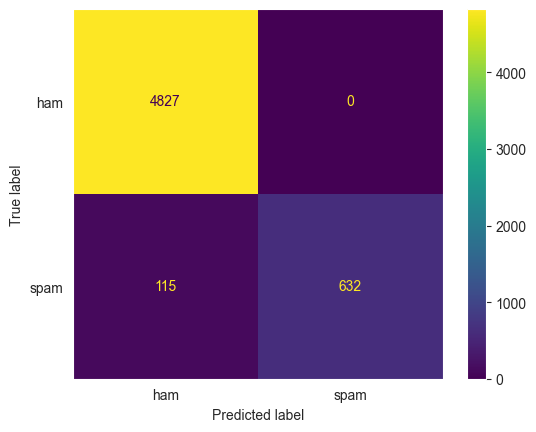

In [36]:
# EValuating the model

from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay.from_predictions(dat1["type"],predictions)